# Gridworld with Value Iteration

In [1]:
import numpy as np
import random

# display output
from random import uniform
import time
from IPython.display import display, clear_output

In [2]:
actions = [[-1, 0], [0, 1], [1, 0], [0, -1]] #up, right, down, left = (clockwise from up) 
action_count = len(actions) # total number of actions
gridSize = 5 # create a square grid of gridSize by gridSize
state_count = gridSize*gridSize # total number of states

In [3]:
# initialize a policy: create an array of dimension (number of states by number of actions)
# for equal probability amongst all actions, divide everything by the number of actions
policy = np.ones([state_count, action_count]) / action_count

# policy at state 0 = [0, 0]
# returns a probability for each action given state
policy[0]

array([0.25, 0.25, 0.25, 0.25])

In [4]:
class Gridworld():
    def __init__(self, gridSize):
        self.valueMap = np.zeros((gridSize, gridSize))
        self.states = [[i, j] for i in range(gridSize) for j in range(gridSize)]
        self.size = gridSize
        self.new_pos = [0, 0] # initialize new position for p_transition
        self.pos_check = [0, 0] # a copy of new position
        self.transition_prob = 1 # deterministic
    
    def initial_state(self):
        # randomly generate an initial state
        i = random.randint(0, len(self.states)-1)
        rand_state = self.states[i]
        return rand_state
    
    def possible_states(self):
        # return the possible states
        return self.states
    
    def reward(self, current_pos, action):
        # return the reward        
        
        # take action in current pos
        self.new_pos = np.array(current_pos) + np.array(action)

        # normally, reward = 0
        reward = 0

        # if new pos results in off the grid, return reward -1
        if -1 in self.new_pos or self.size in self.new_pos:
            reward = -1
        # if in state A, transition to state A'
        if current_pos == [0, 1]:
            reward = 10
        # if in state B, transition to state B'
        if current_pos == [0, 3]:
            reward = 5
        return reward
    
    # def transition_probability(self, current_pos, new_pos):
        # a function that returns the entries of the transition probability matrix?
        # eg. input current state, new state, output = 0.25...0.5...1 ... etc. ?
    
    def p_transition(self, current_pos, action):
        # return the transition probability
        # get next position: state: [0, 0], action: [0, 1], new_state = [0, 1]
        self.new_pos = np.array(current_pos) + np.array(action)
        self.pos_check = self.new_pos # make a copy of new pos before being overwritten below

        # if taking an action crosses the border = agent stays in same position
        if -1 in self.new_pos or self.size in self.new_pos: 
            self.new_pos = current_pos
            
        # if in state A, transition to state A'
        if current_pos == [0, 1]:
            self.new_pos = [4, 1]
            
        # if in state B, transition to state B'
        if current_pos == [0, 3]:
            self.new_pos = [2, 3]
        return self.new_pos

# Value Iteration

In [5]:
# create a grid object
grid = Gridworld(5)
grid.valueMap

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [6]:
# function to calculate action value with the current policy
def calculate_action_value(state, value):
    A = np.zeros(action_count)
    
    # perform 4 actions per state and add the rewards (value)
    for action_number, action in enumerate(actions):
            
        # get next position and reward
        new_position = grid.p_transition(state, action)
        reward = grid.reward(state, action)
        
        # get next position and reward
        new_position = grid.p_transition(state, action)
        reward = grid.reward(state, action)

        # calculate value of action: transition_prob*[r + gamma * value(s')]
        A[action_number] += grid.transition_prob*(reward+(discount_factor*value[new_position[0], new_position[1]]))
    
    return A

In [7]:
# Value Iteration

discount_factor = 0.99 # small prefer immediate reward, large prefer future reward
iterations = 0
theta = 0.000001
delta_list = []

while True:
    delta = 0
    iterations+=1
    valueMap_copy = np.copy(grid.valueMap)

    
    # FIND OPTIMAL VALUE #######################################################   
    # start with the first state in the state list
    for state_number, state in enumerate(grid.states):
        value = 0

        # calculate best action value given current state and value function
        action_values = calculate_action_value(state, grid.valueMap)

        # choose the best action value
        best_action_value = np.max(action_values)

        # value of current state is equal to the best action value
        value = best_action_value

        # replace the value in valueMap with the value
        valueMap_copy[state[0], state[1]] = value

        # calculate delta
        delta = max(delta, np.abs(value - grid.valueMap[state[0], state[1]]))       
        clear_output(wait=True)
        display('delta: ' + str(delta) + ' iterations: ' + str(iterations))

        # save data for plot
        delta_list.append(delta)

    # overwrite the original value map (after complete iteration of every step)
    grid.valueMap = valueMap_copy

    # stop when change in value function falls below a given threshold
    if delta < theta:
        break

# EXTRACT POLICY FROM OPTIMAL VALUE #####################################################
for state_number, state in enumerate(grid.states):
    # using the current value map (optimal at this point), calculate the action values
    action_values = calculate_action_value(state, grid.valueMap)
    # return the action with the highest action value
    best_action = np.argmax(action_values)
    # update policy accordingly
    policy[state_number] = np.eye(action_count)[best_action]

'delta: 1.2317230186909e-06 iterations: 1584'

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
# print value map to 4 decimal places
np.set_printoptions(precision=4)
grid.valueMap

array([[201.9998, 204.0402, 201.9998, 199.0402, 197.0498],
       [199.9798, 201.9998, 199.9798, 197.98  , 196.0002],
       [197.98  , 199.9798, 197.98  , 196.0002, 194.0402],
       [196.0002, 197.98  , 196.0002, 194.0402, 192.0998],
       [194.0402, 196.0002, 194.0402, 192.0998, 190.1788]])

## Plot Delta

In [9]:
import matplotlib.pyplot as plt

In [10]:
# get every 25th value
delta_list2 = delta_list[0::state_count]

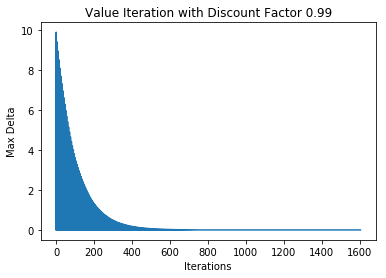

In [11]:
# plot iteration vs delta
plt.plot(range(iterations), delta_list2)
plt.title('Value Iteration with Discount Factor ' + str(discount_factor))
plt.xlabel('Iterations')
plt.ylabel('Max Delta')
plt.savefig('graphs/Value-'+str(discount_factor)+'.png')

# Print Policy Table 

In [12]:
# import pandas library
import pandas as pd
# define column and index
columns=range(grid.size)
index = range(grid.size)
# define dataframe to represent policy table
policy_table = pd.DataFrame(index = index, columns=columns)

In [13]:
# iterate through policy to make a table that represents action number
# as action name (eg. left, right, up, down)
for state in range(len(policy)):
    for action in range(policy.shape[1]):
        if policy[state][action] == 1:
            
            # calculate the row and column coordinate of the current state number
            row = int(state/grid.size)
            column = round((state/grid.size - int(state/grid.size))*grid.size)

            # get action name
            if action == 0:
                action_name = 'up'
            elif action == 1:
                action_name = 'right'
            elif action == 2:
                action_name = 'down'
            else:
                action_name = 'left'
            
            # assign action name
            policy_table.loc[row][column] = action_name
            

In [14]:
# print policy table
policy_table

0   1     2     3     4
0  right  up  left    up  left
1     up  up    up  left  left
2     up  up    up    up    up
3     up  up    up    up    up
4     up  up    up    up    up

# Separate Code 

## Value Iteration

In [15]:
# # Value Iteration

# iterations = 0
# delta_list = []

# while True:
#     delta = 0
#     iterations+=1
#     valueMap_copy = np.copy(grid.valueMap)

#     # start with the first state in the state list
#     for state_number, state in enumerate(grid.states):
#         value = 0

#         # calculate best action value given current state and value function
#         action_values = calculate_action_value(state, grid.valueMap)

#         # choose the best action value
#         best_action_value = np.max(action_values)

#         # value of current state is equal to the best action value
#         value = best_action_value

#         # replace the value in valueMap with the value
#         valueMap_copy[state[0], state[1]] = value

#         # calculate delta
#         delta = max(delta, np.abs(value - grid.valueMap[state[0], state[1]]))       
#         clear_output(wait=True)
#         display('delta: ' + str(delta) + ' iterations: ' + str(iterations))

#         # save data for plot
#         delta_list.append(delta)

#     # overwrite the original value map
#     grid.valueMap = valueMap_copy

#     # stop when change in value function falls below a given threshold
#     if delta < theta:
#         break

In [16]:
# # print value map to 4 decimal places
# np.set_printoptions(precision=4)
# grid.valueMap

In [17]:
# # turn optimal value in to action and update policy
# for state_number, state in enumerate(grid.states):
#     action_values = calculate_action_value(state, grid.valueMap)
#     best_action = np.argmax(action_values)
#     policy[state_number] = np.eye(action_count)[best_action]

In [18]:
# policy